## ENPM808W: Homework 1 - Question 1
#### Submitted by: Gauhar Bains

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

## Load the Data

In [2]:
# path to data
cwd = os.getcwd()
Data_dir = os.path.join(cwd, 'Nyt_Dataset')

In [3]:
# load the data into a data frame
df = pd.read_csv(os.path.join(Data_dir, 'nyt1.csv'))

# preview the data
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


## Get a general idea about the dataset

In [4]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


######################################################################################
# Question 1-a
  
Create a new variable, age_group, that categorizes users as “<18”, ”18-24”, ”25-
34”, ”35-44”, ”45-54”, “55-64” and “65+”.


######################################################################################

In [5]:
# function to filter by age into desired categories
def filter_age(age):
    if age < 18:
        return "<18"
    if age >= 18 and age <=24:
        return "18-24"
    if age >= 25 and age <=34:
        return "25-34"
    if age >= 35 and age <=44:
        return "35-44"
    if age >= 45 and age <=54:
        return "45-54"
    if age >= 55 and age <=64:
        return "55-64"
    if age >= 65:
        return "65+"

In [6]:
# filter age group
age_group = []
for i in df['Age']:
    age_group.append(filter_age(i))

# add the age_group column to dataframe
df['age_group'] = age_group

In [7]:
# preview the updated datafame
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54


######################################################################################
# Question 1-b (i)

Plot the distributions of number impressions and click-through-rate
(CTR=# clicks/# impressions), for these 6 age categories.
######################################################################################



## Add column for click through rate

In [8]:
# find the ctr for each entry and store them
ctr = []
for index in range(df.shape[0]):
    click = df['Clicks'][index]
    impression= df['Impressions'][index]
    ctr.append(click/impression)
# Add CTR column
df['CTR'] = ctr

C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [9]:
# preview the updated dataframe
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65+,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0


## Plot distributions of #Impressions by age-group

```
Two sets of plots are shown. 
1. The first set shows the distribution of #impressions for each age group in a seperate plot. 
2. The second plot shows them all overlayed on a single plot.
```

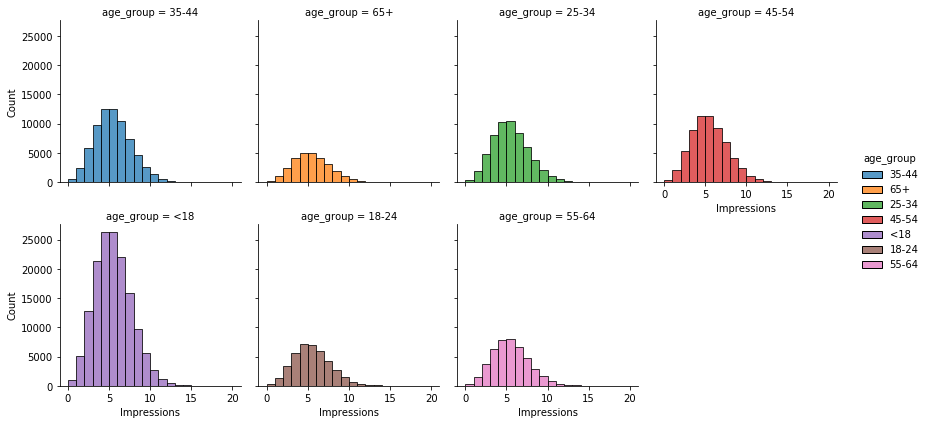

In [10]:
ax1 = sns.displot(df, x="Impressions", binwidth=1, hue='age_group',col = 'age_group',col_wrap=4, height = 3)

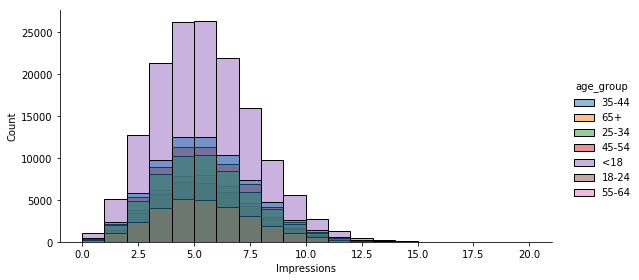

In [11]:
ax2 = sns.displot(df, x="Impressions", binwidth=1, hue='age_group', height = 4, aspect = 2)

## Plot distributions of CTR by age group

Two sets of plots are shown. 
1. The first set shows the distribution of CTR for each age group in a seperate plot. 
2. The second plot shows them all overlayed on a single plot.

#### Note : Y axis has been log-scaled.

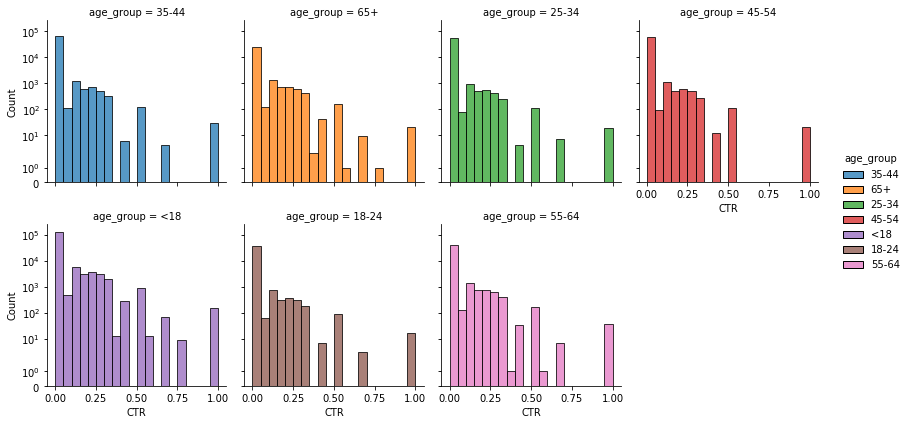

In [12]:
ax3 = sns.displot(df, x="CTR", binwidth = 0.05, hue='age_group',col = 'age_group',col_wrap=4, height = 3)
ax3.set(yscale='symlog')

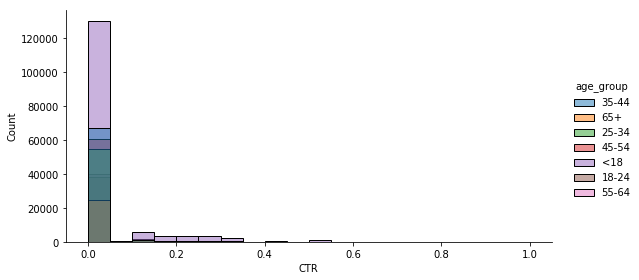

In [13]:
ax2 = sns.displot(df, x="CTR", binwidth=0.05, hue='age_group', height = 4, aspect = 2)

######################################################################################
# Question 1-b-ii

Define a new variable to segment or categorize users based on their click
behavior.

######################################################################################

## Add column for response rating

In [14]:
def check_click_behaviour(ctr):  
    if ctr >= 0.15:
        return "Very Responsive"
    elif ctr >= 0.05 and ctr < 0.15:
        return "Moderately Responsive"
    elif ctr > 0 and ctr < 0.05:
        return "Less Responsive"
    else:
        return "Non Responsive"

In [15]:
# create Response Rating Column
response = []
for ctr in df['CTR']:
    response.append(check_click_behaviour(ctr))
df['Response Rating'] = response


In [16]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR,Response Rating
0,36,0,3,0,1,35-44,0.0,Non Responsive
1,73,1,3,0,1,65+,0.0,Non Responsive
2,30,0,3,0,1,25-34,0.0,Non Responsive
3,49,1,3,0,1,45-54,0.0,Non Responsive
4,47,1,11,0,1,45-54,0.0,Non Responsive


In [17]:
df.groupby("Response Rating").describe()

Age                                              \
                          count       mean        std  min  25%   50%   75%   
Response Rating                                                               
Moderately Responsive   13744.0  26.553478  26.849863  0.0  0.0  21.0  51.0   
Non Responsive         418603.0  29.872872  23.231321  0.0  0.0  31.0  48.0   
Very Responsive         26094.0  24.763739  26.911709  0.0  0.0  17.0  49.0   

                                   CTR           ...  Impressions        \
                         max     count      mean ...          75%   max   
Response Rating                                  ...                      
Moderately Responsive   98.0   13744.0  0.124448 ...          9.0  17.0   
Non Responsive         108.0  415537.0  0.000000 ...          6.0  20.0   
Very Responsive        107.0   26094.0  0.256787 ...          6.0  14.0   

                      Signed_In                                               
                          count      mean       std  min  25%  50%  75%  max  
Response Rating                                                               
Moderately Responsive   13744.0  0.580835  0.493440  0.0  0.0  1.0  1.0  1.0  
Non Responsive         418603.0  0.714933  0.451447  0.0  0.0  1.0  1.0  1.0  
Very Responsive         26094.0  0.539549  0.498443  0.0  0.0  1.0  1.0  1.0  

[3 rows x 48 columns]

######################################################################################
## Question 1-b-iii

Explore the data and make visual and quantitative comparisons across
user segments/ demographics (<18 year old male vs < 18 year old
females or logged-in vs not, for example).

######################################################################################

### 1. Response Behavior
  
* The plot below compares the distributions of males and females based on their response rating and whether they were signed in or not.
* An intersing observation that can be seen from the plots below is that almost all the males user were signed in. 

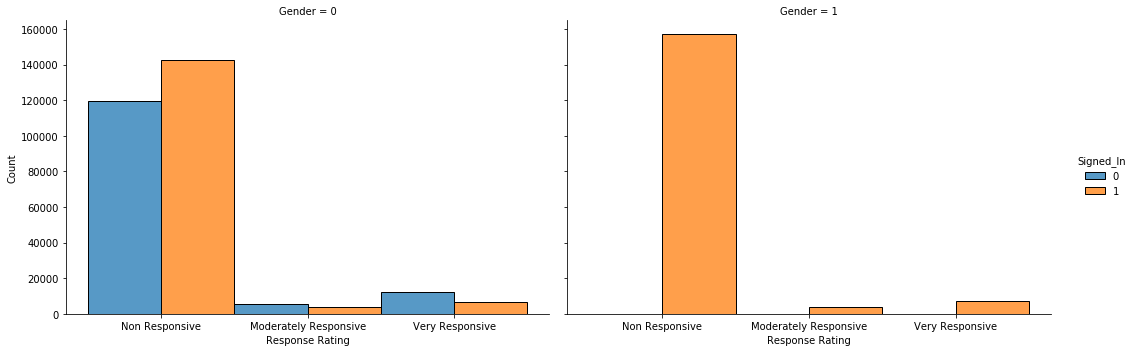

In [18]:
ax3 = sns.displot(df, x="Response Rating",  hue='Signed_In', col= 'Gender', height = 5, aspect=1.5,multiple="dodge" )

### 2. Finding the users which are most Responsive

* The plot below only consists of data from users which are characterized as "Very Responsive"
* The plot on the left is for females whereas the plot on the right is for males
* It can be seen that Females under 18 are the users which are most responsive

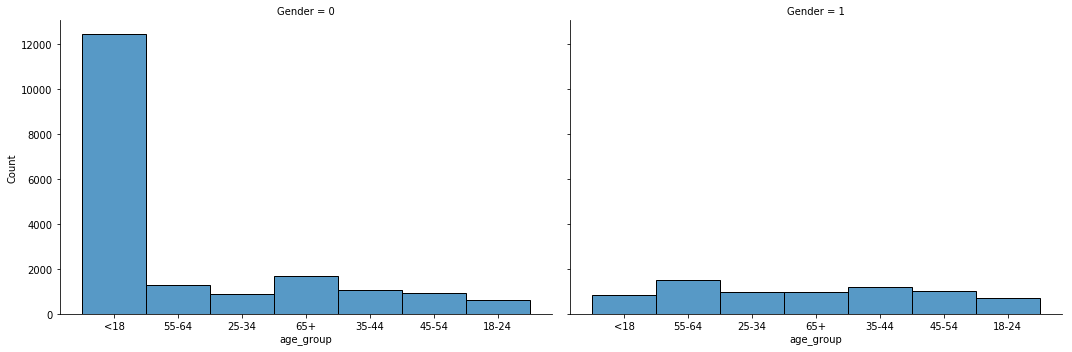

In [19]:
ax4 = sns.displot(df[df["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', height = 5, aspect=1.5,multiple="dodge" )

######################################################################################
# Question 1-c

Create metrics/measurements/statistics that summarize the data. Examples of
potential metrics include CTR, quantiles, mean, median, variance, max, and
these can be calculated across the various user segments. Be selective. Think
about what will be important to track over time; what will compress the data, but
still capture user behavior. Now extend your analysis across days (one week is
sufficient). Visualize metrics and distributions over time. Your plot should
emphasize what actually changes over days

######################################################################################

### Load data from other 7 days

In [20]:
day1 = pd.read_csv(os.path.join(Data_dir, 'nyt1.csv'))
day2 = pd.read_csv(os.path.join(Data_dir, 'nyt2.csv'))
day3 = pd.read_csv(os.path.join(Data_dir, 'nyt3.csv'))
day4 = pd.read_csv(os.path.join(Data_dir, 'nyt4.csv'))
day5 = pd.read_csv(os.path.join(Data_dir, 'nyt5.csv'))
day6 = pd.read_csv(os.path.join(Data_dir, 'nyt6.csv'))
day7 = pd.read_csv(os.path.join(Data_dir, 'nyt7.csv'))

In [21]:
# add the age group variable to each of these dataframes
day1["age_group"] = [filter_age(i) for i in day1["Age"]]
day2["age_group"] = [filter_age(i) for i in day2["Age"]]
day3["age_group"] = [filter_age(i) for i in day3["Age"]]
day4["age_group"] = [filter_age(i) for i in day4["Age"]]
day5["age_group"] = [filter_age(i) for i in day5["Age"]]
day6["age_group"] = [filter_age(i) for i in day6["Age"]]
day7["age_group"] = [filter_age(i) for i in day7["Age"]]


In [22]:
# add the CTR variable to each of these dataframes
day1["CTR"] = [day1['Clicks'][index]/day1['Impressions'][index] for index in range(len(day1['Clicks']))]
day2["CTR"] = [day2['Clicks'][index]/day2['Impressions'][index] for index in range(len(day2['Clicks']))]
day3["CTR"] = [day3['Clicks'][index]/day3['Impressions'][index] for index in range(len(day3['Clicks']))]
day4["CTR"] = [day4['Clicks'][index]/day4['Impressions'][index] for index in range(len(day4['Clicks']))]
day5["CTR"] = [day5['Clicks'][index]/day5['Impressions'][index] for index in range(len(day5['Clicks']))]
day6["CTR"] = [day6['Clicks'][index]/day6['Impressions'][index] for index in range(len(day6['Clicks']))]
day7["CTR"] = [day7['Clicks'][index]/day7['Impressions'][index] for index in range(len(day7['Clicks']))]

C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.
C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """
C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
C:\Users\gauha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: Runti

In [23]:
# add variable to check responsiveness
day1["Response Rating"] = [check_click_behaviour(ctr) for ctr in day1["CTR"]]
day2["Response Rating"] = [check_click_behaviour(ctr) for ctr in day2["CTR"]]
day3["Response Rating"] = [check_click_behaviour(ctr) for ctr in day3["CTR"]]
day4["Response Rating"] = [check_click_behaviour(ctr) for ctr in day4["CTR"]]
day5["Response Rating"] = [check_click_behaviour(ctr) for ctr in day5["CTR"]]
day6["Response Rating"] = [check_click_behaviour(ctr) for ctr in day6["CTR"]]
day7["Response Rating"] = [check_click_behaviour(ctr) for ctr in day7["CTR"]]

### Analyze mean, 25th to 75th percentile, standard deviation to get an idea about data from each of these days

* It can be seen thatthe mean and standard devioations of almost all categories remains the same through the week.
* The only major changes is in the number of users. The number of users decrease on day 5 but there is a significant increase on day 6. 
* The number of users significantly higher on day 6. Around 75 % increase is observed.



In [24]:
day1.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,455375.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930,0.018471
std,23.607034,0.481997,2.239349,0.309973,0.457851,0.069034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000,1.000000


In [25]:
day2.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,449935.000000,449935.000000,449935.000000,449935.000000,449935.000000,446879.000000
mean,29.508509,0.374401,4.999580,0.092796,0.700908,0.018462
std,23.635757,0.483968,2.233423,0.310476,0.457861,0.068851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,111.000000,1.000000,19.000000,5.000000,1.000000,1.000000


In [26]:
day3.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,440370.000000,440370.000000,440370.000000,440370.000000,440370.000000,437371.000000
mean,29.468025,0.366835,4.996342,0.092263,0.700064,0.018544
std,23.639039,0.481941,2.234935,0.309662,0.458230,0.069474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,109.000000,1.000000,19.000000,6.000000,1.000000,1.000000


In [27]:
day4.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,442857.000000,442857.000000,442857.000000,442857.000000,442857.000000,439909.000000
mean,29.431970,0.369487,5.003534,0.092558,0.699151,0.018410
std,23.652239,0.482666,2.236958,0.309831,0.458628,0.068845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,108.000000,1.000000,18.000000,4.000000,1.000000,1.000000


In [28]:
day5.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,370328.000000,370328.000000,370328.000000,370328.000000,370328.000000,367823.000000
mean,29.433321,0.368274,4.998709,0.092164,0.699318,0.018352
std,23.646755,0.482337,2.237361,0.309516,0.458555,0.068422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,106.000000,1.000000,18.000000,5.000000,1.000000,1.000000


In [29]:
day6.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,764510.000000,764510.000000,764510.000000,764510.000000,764510.000000,759397.000000
mean,29.458397,0.355146,4.995498,0.092258,0.699979,0.018482
std,23.614727,0.478558,2.234439,0.309788,0.458267,0.069342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,106.000000,1.000000,20.000000,4.000000,1.000000,1.000000


In [30]:
day7.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,452493.000000,452493.000000,452493.000000,452493.000000,452493.000000,449382.000000
mean,29.519818,0.352308,5.000117,0.092532,0.700172,0.018422
std,23.678974,0.477690,2.236483,0.310539,0.458183,0.068752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,112.000000,1.000000,19.000000,4.000000,1.000000,1.000000


## Distributions of users characterized as "Very Responsive" across a week grouped by age 

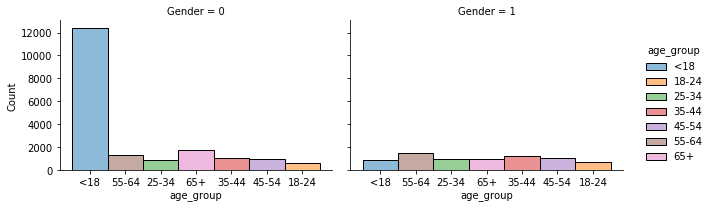

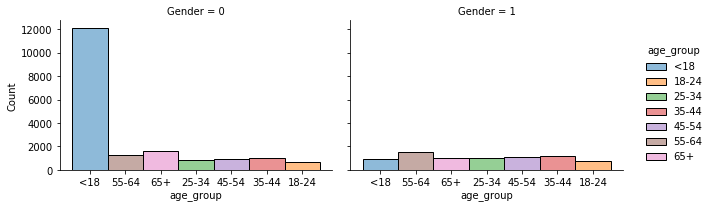

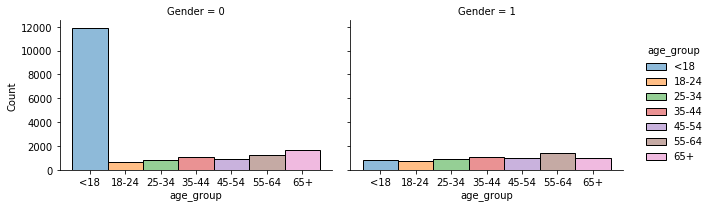

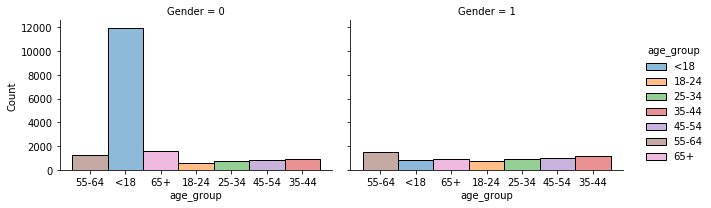

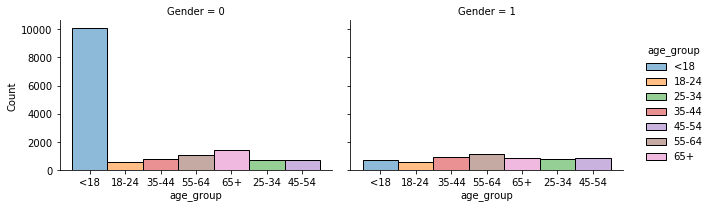

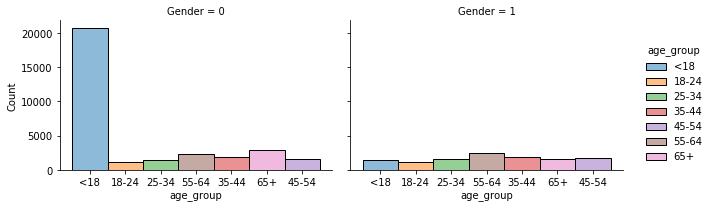

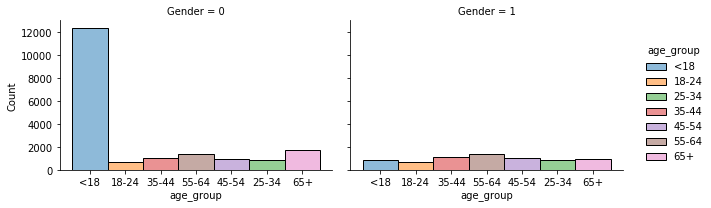

In [31]:
age_group_order = ["<18","18-24","25-34","35-44","45-54","55-64","65+"]
ax1 = sns.displot(day1[day1["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', hue="age_group", height = 3, aspect=1.5, hue_order = age_group_order )
ax2 = sns.displot(day2[day2["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', hue="age_group", height = 3, aspect=1.5, hue_order = age_group_order)
ax3 = sns.displot(day3[day3["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', hue="age_group", height = 3, aspect=1.5, hue_order = age_group_order)
ax4 = sns.displot(day4[day4["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', hue="age_group", height = 3, aspect=1.5, hue_order = age_group_order)
ax5 = sns.displot(day5[day5["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', hue="age_group", height = 3, aspect=1.5, hue_order = age_group_order)
ax6 = sns.displot(day6[day6["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', hue="age_group", height = 3, aspect=1.5, hue_order = age_group_order)
ax7 = sns.displot(day7[day7["Response Rating"]=="Very Responsive"], x="age_group", col= 'Gender', hue="age_group", height = 3, aspect=1.5, hue_order = age_group_order)

In [32]:
day1.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR,Response Rating
0,36,0,3,0,1,35-44,0.0,Non Responsive
1,73,1,3,0,1,65+,0.0,Non Responsive
2,30,0,3,0,1,25-34,0.0,Non Responsive
3,49,1,3,0,1,45-54,0.0,Non Responsive
4,47,1,11,0,1,45-54,0.0,Non Responsive


######################################################################################
# Question 1-d (Also incudes information to answer 1c)

Describe and interpret any patterns you find.

######################################################################################

* ### For a single day: 
    1. The most impressions are generated by users which are under 18.
    2. Almost 90% of users are characterized as non-responsive i.e they have a very low CTR rate. 
    3. Around 10% of users are characterized as very responsive.
    4. Among the users that are characterized as very responsive -- females below 18 dominate  
       i.e majority of the users that are very responsive are females under 18.
    5. Another intersing observation is that all the males user were signed in. Where as female users consisted of both signed in/not signed in users.
    
* ### Across a Week 
    1. The mean, standard deviation, quartiles of the data was observed across a week.
    2. The only significant change was observed in the number of users. Day 6  reported an increase by almost 70%. 
       This can be attributed to the fact that day 6 is a weekend. My guess is that its a Sunday or a holiday. 
    3. All other categories - such has age of users, impressions/user, CTR was found to be consistent through out the week.
    4. Females below 18 were found to be the users that are characterized as very responsive through out the week. 
    
* ### Compress the data 

  1. The data can be compressed based on what our goal is. For example, now that we know that females below 18 are the most responsive -- for advertisement purposes we can   
     only analyse user behaviour for them to determine what type of clicks lead to an actual purchase or what type of adds were the most clicked on. Using this information  
     we can display similar types of advertisements.  
  2. We can remove the `Age` column and just keep the column denoting the age group as I belive the actual age of the user doesn't carry much information.
  3. Instead of keeping all 3 columns Clicks, Impressions, CTR. We can only keep 2 of them for example -- impressions and CTR. We can always obtain clicks from this information if needed. 
  